# Assignment 1
Fit probability distribution on Category 4 & 5 of Atlantic Hurricane Data 

# Reading the Data

In [169]:
data4 <- read.csv("hurricanes4.csv", header = TRUE, sep=",")
head(data4)

ï..Name,Season,Month,Maximum.Sustained.Wind,Minimum.pressure
Hurricane #3,1853,"August, September",150,924
1856 Last Island Hurricane,1856,August,150,934
Hurricane #6,1866,"September, October",140,938
Hurricane #7,1878,"September, October",140,938
Hurricane #2,1880,August,150,931
Hurricane #8,1880,"September, October",140,928


# Cleaning the Data

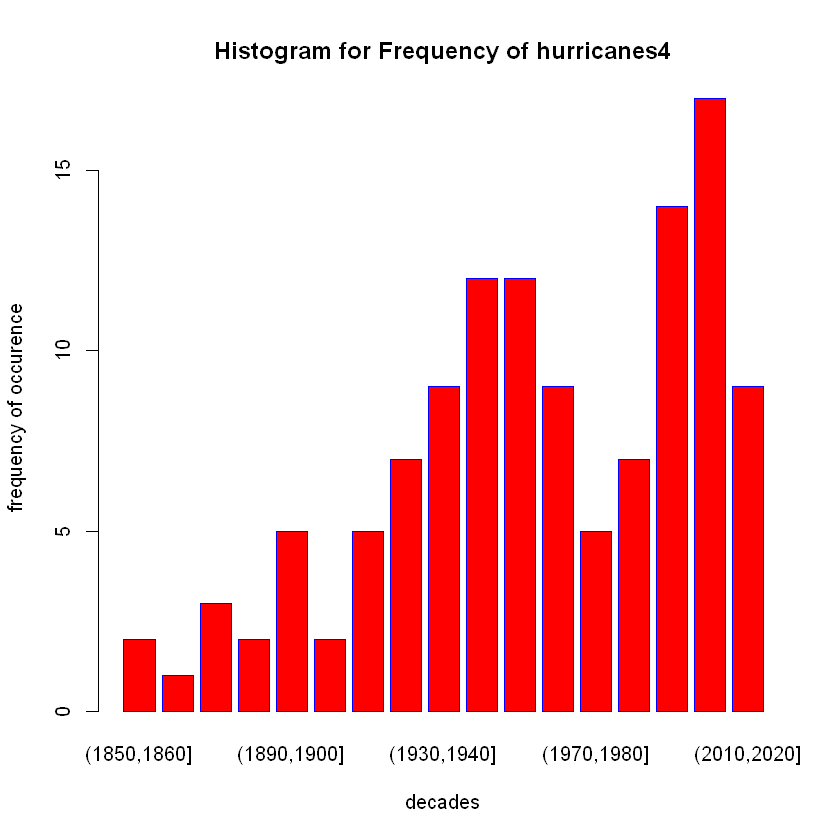

In [170]:
season_interval_4 = data4$Season

interval_4 = seq(1850,2020,by=10)

Frequency_4 = cut(season_interval_4, interval_4, dig.lab=5)

Frequencytable_4 = table(Frequency_4)

results4 <- data.frame(Frequencytable_4)

colnames(results4) <- c("decadeinterval","frequencycount")

barplot(Frequencytable_4,main="Histogram for Frequency of hurricanes4",xlab = "decades", ylab="frequency of occurence",col = "red",border = "blue")

Name,Season,Month,Maximum.Sustained.Wind,Minimum.pressure
Cuba,1924,october,165,910
San Felipe,1928,september,160,929
Bahamas,1932,september,160,921
Cuba,1932,november,175,915
Cuba-Brownsville,1933,august,160,930
Tampico,1933,september,160,929


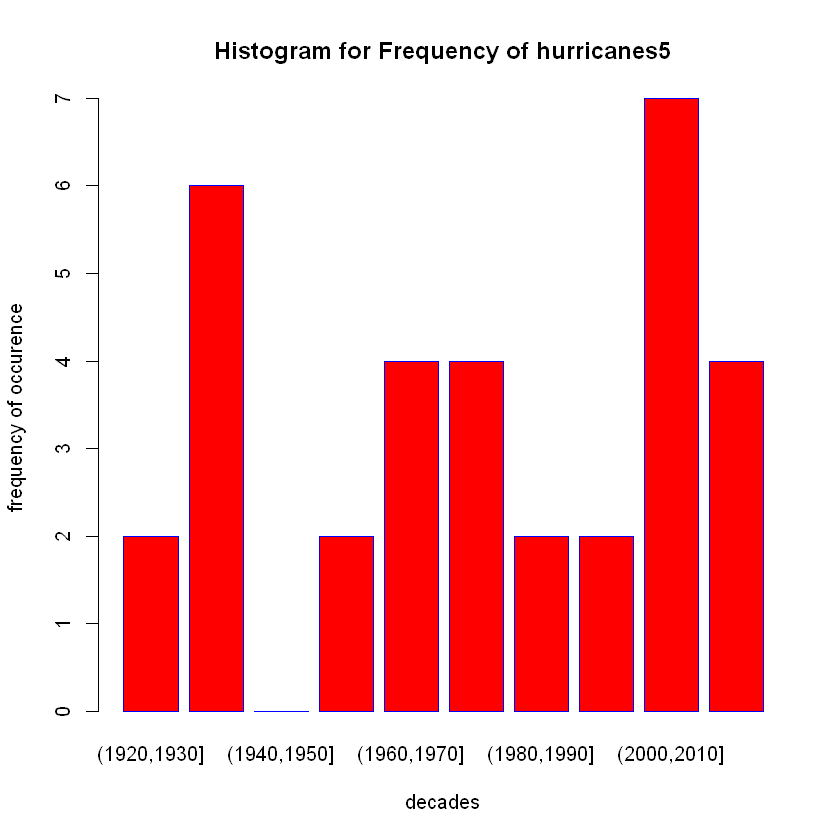

In [171]:
data5 <- read.csv("hurricanes5.csv", header = TRUE, sep=",")
head(data5)

season_interval_5 = data5$Season

interval_5 = seq(1920,2020,by=10)

Frequency_5 = cut(season_interval_5, interval_5, dig.lab=5)

Frequencytable_5 = table(Frequency_5)

results5 <- data.frame(Frequencytable_5)
colnames(results5) <- c("decadeinterval","frequencycount")

barplot(Frequencytable_5,main="Histogram for Frequency of hurricanes5",xlab = "decades", ylab="frequency of occurence",col = "red",border = "blue")

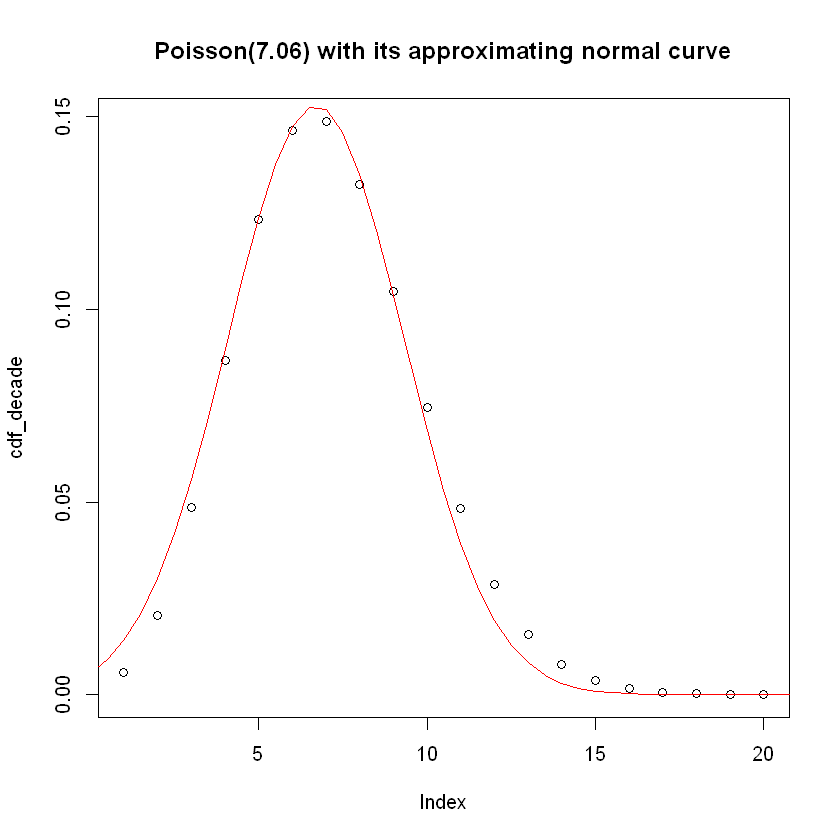

In [174]:
sd_frequency4 = sd(Frequencytable_4)

mean_frequency4 =mean(Frequencytable_4)
 
number_of_decades4 = nrow(Frequencytable_4)

variance4 = var(Frequencytable_4)

mean_frequency5 =mean(Frequencytable_5)
 
number_of_decades5 = nrow(Frequencytable_5)

variance5 = var(Frequencytable_5)

cdf_decade <- c()
for (i in 1:20){
  cdf_decade[i] <- dpois(i, mean_frequency4)
}

plot(cdf_decade, main = "Poisson(7.06) with its approximating normal curve")

normden <- function(x){
dnorm(x, mean = 6.7, sd = sqrt(6.8))
}

curve(normden, from = 0, to = 50, add=TRUE, col="red")


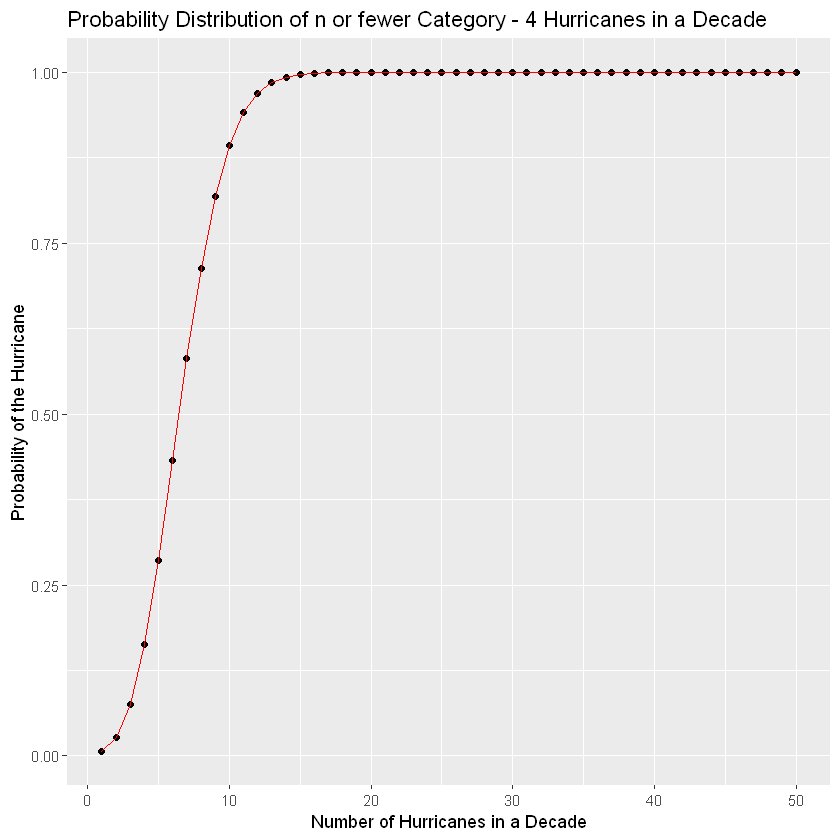

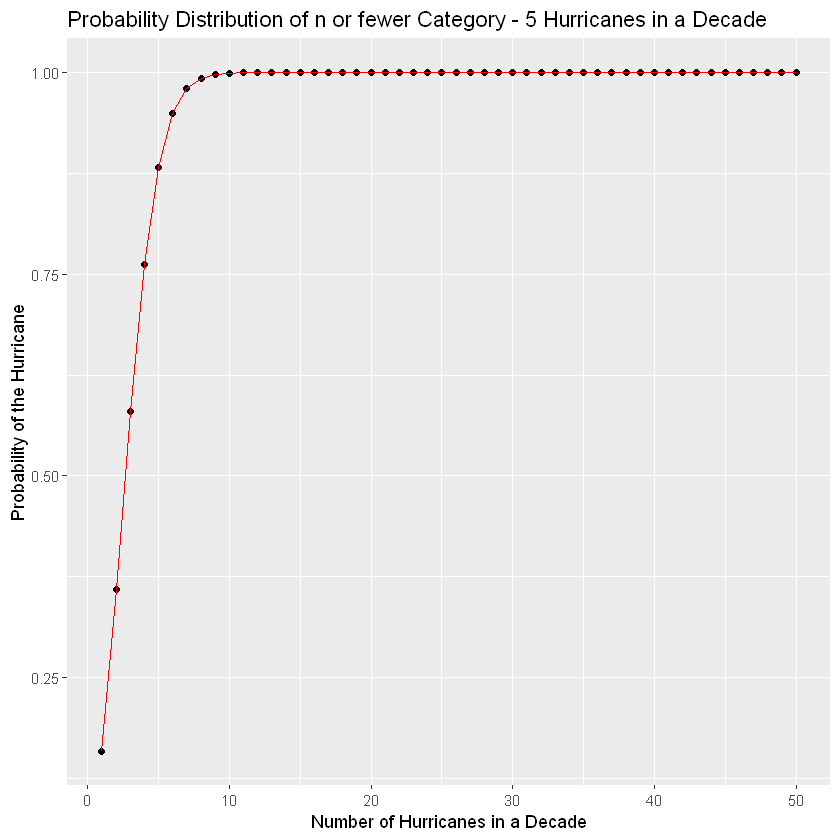

In [106]:
get_ppois_poisson_probabilities <- function(lambda){
    
    poisson_probabilities <- c()
    for (i in 1:50){
      # Probability of *i* or less hurricanes occuring in a decade
      poisson_probabilities[i] <- ppois(i, lambda = lambda)
    }

    poisson_probabilities_df <- as.data.frame(poisson_probabilities)
    poisson_probabilities_df$num_hurricanes_in_the_decade <- c(1:50)
    colnames(poisson_probabilities_df) <- c("poisson_probabilities", "number_of_hurricanes")
    
    return(poisson_probabilities_df)
}

category_4_ppois_poisson_probabilities_df <- get_ppois_poisson_probabilities(lambda = mean_frequency4)
                                                                            
category_5_ppois_poisson_probabilities_df <- get_ppois_poisson_probabilities(lambda = mean_frequency5)

category_4_ppois_poisson_probabilities_df %>%
ggplot(aes(x = number_of_hurricanes, y = poisson_probabilities))+
geom_point()+
geom_line(color = "red")+
labs(x = "Number of Hurricanes in a Decade", y = "Probability of the Hurricane", title = "Probability Distribution of n or fewer Category - 4 Hurricanes in a Decade")

category_5_ppois_poisson_probabilities_df %>%
ggplot(aes(x = number_of_hurricanes, y = poisson_probabilities))+
geom_point()+
geom_line(color = "red")+
labs(x = "Number of Hurricanes in a Decade", y = "Probability of the Hurricane", title = "Probability Distribution of n or fewer Category - 5 Hurricanes in a Decade")

# Is it an exact Poisson distribution?

Although the plots look similar to a Poisson distribution, we cannot assume that the data is indeed a Poisson distribution by looking at the plots. Poisson distribution has a property that the mean and variance are equal and we use this property to test the fit of our data. Wecheck if this property is satisfied or almost satisfied by our data. We compute the ratio of mean and variance of our data:




In [107]:
#variance_of_cat_4_hurricanes <- var(results$decadeinterval)
#mean_of_cat_4_hurricanes <- mean(results$decadeinterval)

variance_mean_ratio_for_category_4_hurricanes <- round(variance4/mean_frequency4, 2)
variance_mean_ratio_for_category_4_hurricanes

[1] 3.07

# Monte Carlo Simulation
We see that the variance of our data is 3.07 times larger than the mean of the data. 
We check if such a behaviour is normal or not for a poisson distribution. We check if this is just a one time anomaly or is it recurring or not. We will perform a "Monte Carlo Simulation" and repeatedly sample values from the poisson distribution with the mean/lambda equal to the mean of the hurricane data. Our main aim of the simulation is to check -

Assuming that the category 4 hurricane data is a perfect Poisson distribution, how likely it is for us to generate samples
with a variance-to-mean ratio equal to 3.07

In [164]:
set.seed(420)
variance_mean_ratio_from_samples <- c()
num_of_monte_carlo_simulations <- 1000
num_of_points_in_sample <- nrow(Frequencytable_4)

for (monte_carlo_experiment_index in  1:num_of_monte_carlo_simulations){
    poisson_sample <- rpois(n = num_of_points_in_sample, lambda = mean_frequency4)
    head(poisson_sample)
    variance_mean_ratio_from_samples[[monte_carlo_experiment_index]] <- var(poisson_sample)/mean(poisson_sample)
}

percentage_of_samples_with_variance_mean_ratio_greater_than_3.07 <- sum(variance_mean_ratio_from_samples > variance_mean_ratio_for_category_4_hurricanes)*100/num_of_monte_carlo_simulations
percentage_of_samples_with_variance_mean_ratio_greater_than_3.07

[1] 0

This shows that only 0% of the monte carlo samples have a variance-mean ratio greater than 2.82. Hence, the hurricane count in a decade does not exhibit an exact Poisson process and the variability in hurricane counts is higher than a Poisson distribution with constant rate. This means that for a distribution of hurricane counts in a decade, the lambda/rate is not constant but keeps changing.

# Reasons for the varying lambda/rate in hurricane data

The reasons for the non-constant rate/lambda in our hurricane data is because external climatic conditions affect the occurence of hurricane and ultimately change the lambda. These external factors could be changes in pressure, wind speeds, El Nino etc... This leads to hurricane data being a varying Poisson distribution or an inhomogeneous Poisson distribution which can be described as a Poisson distribution with a variable rate/lambda.

# Analysing using QQ plot

#Quantile plots are a good way to look at what distribution a data might belong to. Here, we plot a quantile plot of our #hurricane data (using the category-4 data again) and quantiles drawn from a theoretical Poisson distribution.



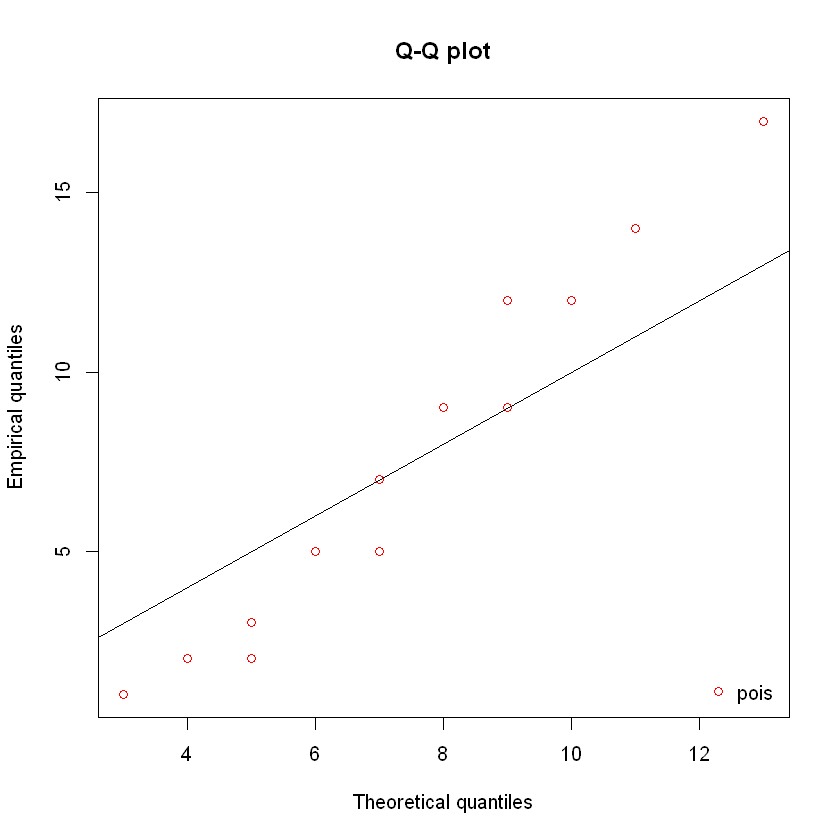

In [173]:
qqcomp(fitdist(results4$frequencycount, "pois"))

The quantile plot strengthens our conclusion that our hurricane data is not entirely a Poisson distribution with a constant 
rate. What if we use a negative binomial distribution for this?

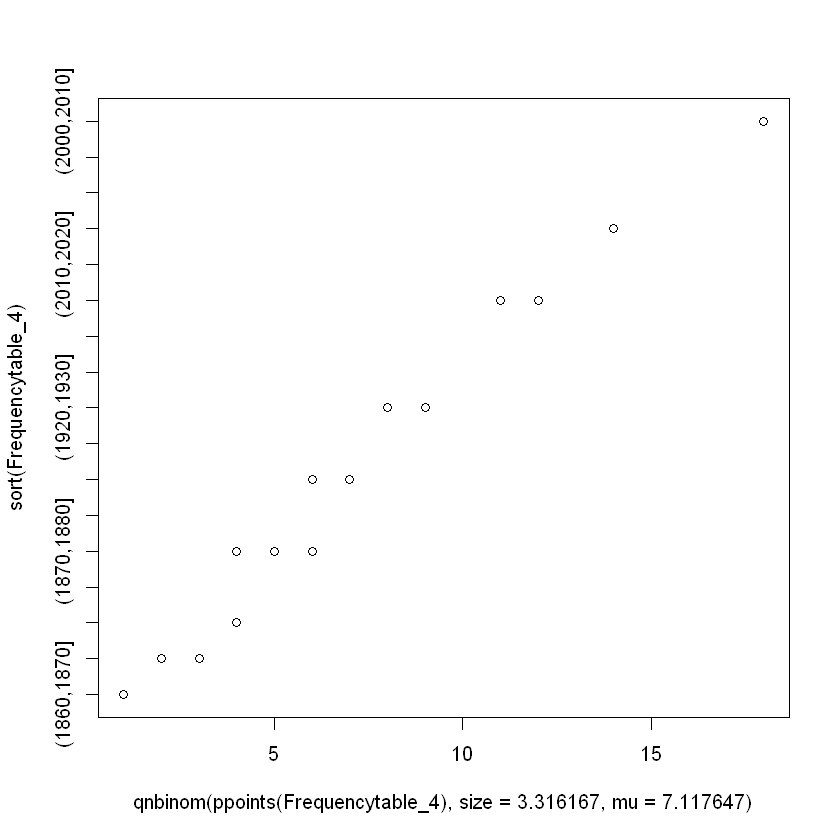

In [175]:
params = fitdistr(Frequencytable_4, "Negative Binomial")
plot(qnbinom(ppoints(Frequencytable_4), size=3.316167, mu=7.117647), sort(Frequencytable_4))

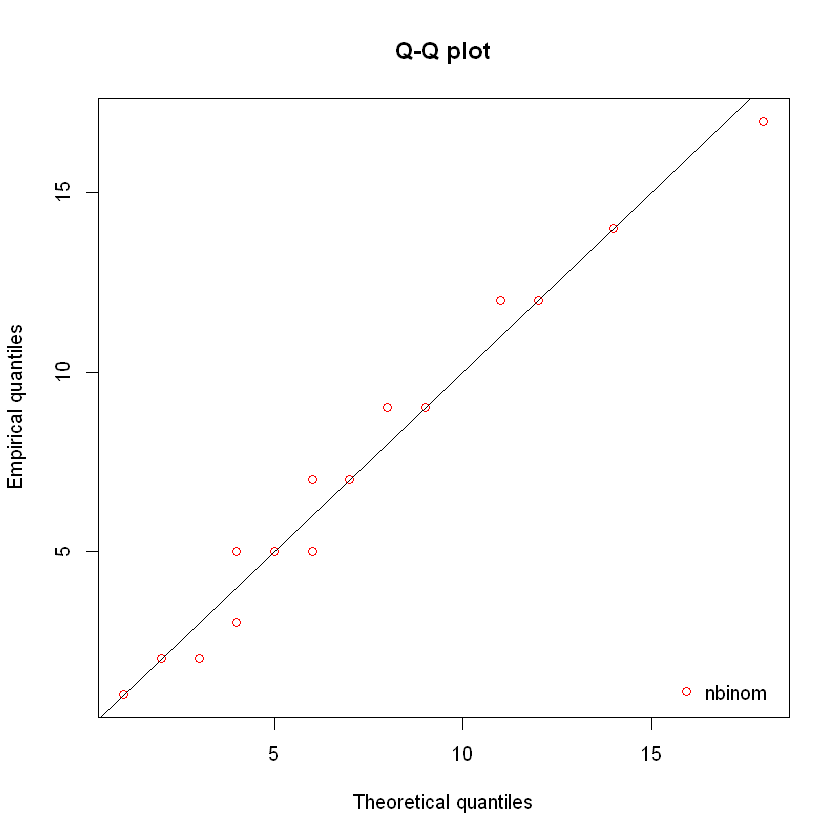

In [176]:
qqcomp(fitdist(results4$frequencycount, "nbinom"))

This shows that the hurricane count data infact is similar to a negative binomial distribution. Poisson distributions are 
special cases of negative binomial distributions and our above distribution is a case of overdispersed Poisson distribution.
In an overdispersed Poisson distribution, the observations are overdispersed in comparison to a theoretical Poisson distribution where variance is equal to the mean. This overdispersion causes the variance of the data to be greater than the mean - which is the case for our hurricane data. Such overdispersion can be reduced by varying the variance and keeping the mean constant. Since negative binomial distributions have one more parameter than a Poisson distribution, we can vary the parameter to adjust the variance keeping the mean constant.

# Let do some analysis on the combine data of Hurricane category 4 and 5

In [81]:
data <- read.csv("Combinehurricane4and5.csv", header = TRUE, sep=",")
head(data)

ï..Name,Season,Month,Maximum.Sustained.Wind,Minimum.pressure
Cuba,1924,october,165,910
San Felipe,1928,september,160,929
Bahamas,1932,september,160,921
Cuba,1932,november,175,915
Cuba-Brownsville,1933,august,160,930
Tampico,1933,september,160,929


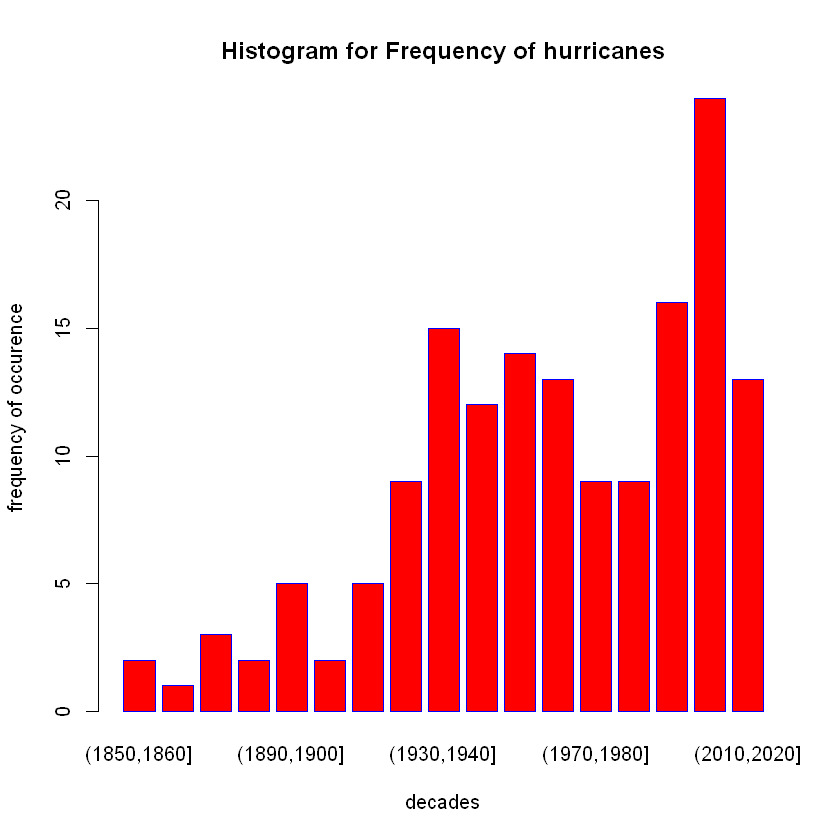

In [177]:
season_interval = data$Season

interval = seq(1850,2020,by=10)

Frequency = cut(season_interval, interval, dig.lab=5)

Frequencytable = table(Frequency)

results <- data.frame(Frequencytable)

colnames(results) <- c("decadeinterval","frequencycount45")

barplot(Frequencytable,main="Histogram for Frequency of hurricanes",xlab = "decades", ylab="frequency of occurence",col = "red",border = "blue")


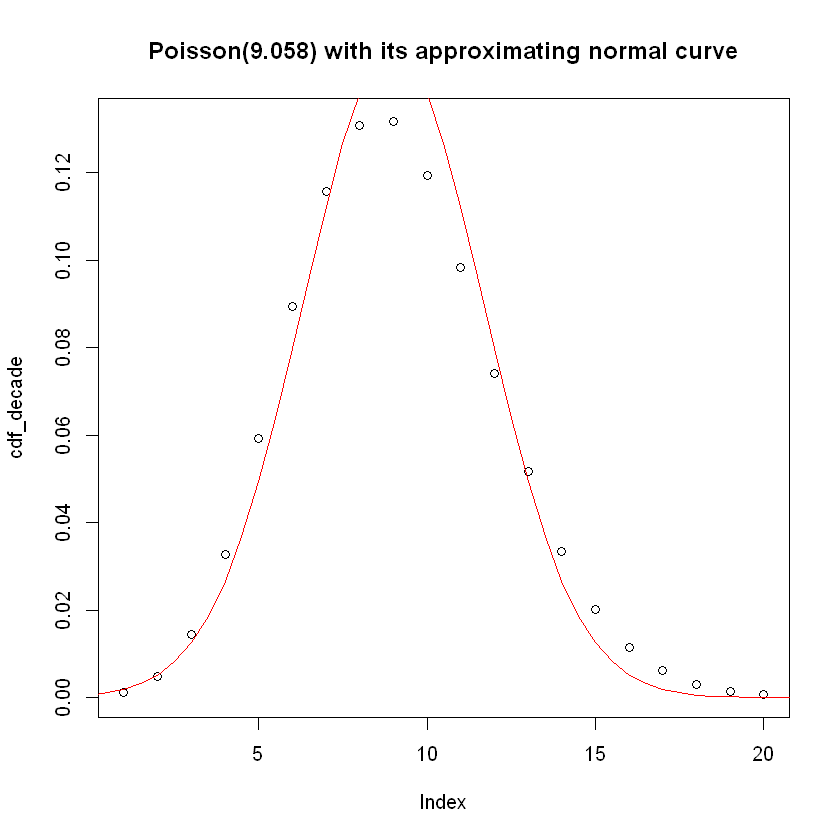

In [178]:
sd_frequency = sd(Frequencytable)

mean_frequency =mean(Frequencytable)
 
number_of_decades = nrow(Frequencytable)

variance = var(Frequencytable)

cdf_decade <- c()
for (i in 1:20){
  cdf_decade[i] <- dpois(i, mean_frequency)
}

plot(cdf_decade, main = "Poisson(9.058) with its approximating normal curve")

normden <- function(x){
  dnorm(x, mean = 9, sd = sqrt(7.3))
}

curve(normden, from = 0, to = 50, add=TRUE, col="red")


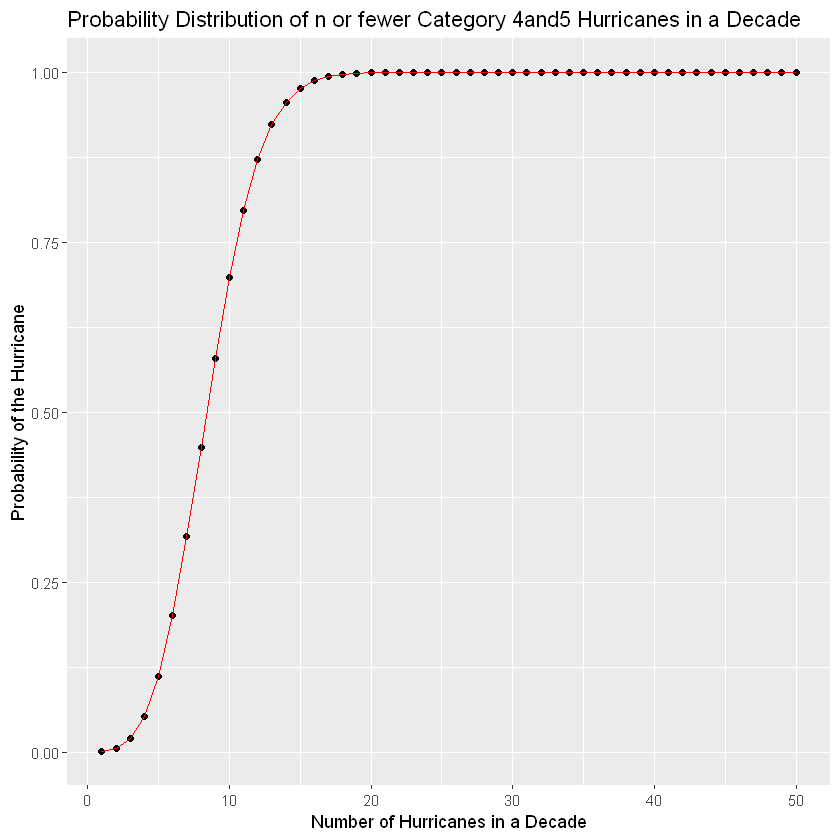

In [104]:
get_ppois_poisson_probabilities <- function(lambda){
    
    poisson_probabilities <- c()
    for (i in 1:50){
      # Probability of *i* or less hurricanes occuring in a decade
      poisson_probabilities[i] <- ppois(i, lambda = lambda)
    }

    poisson_probabilities_df <- as.data.frame(poisson_probabilities)
    poisson_probabilities_df$num_hurricanes_in_the_decade <- c(1:50)
    colnames(poisson_probabilities_df) <- c("poisson_probabilities", "number_of_hurricanes")
    
    return(poisson_probabilities_df)
}

category_45_ppois_poisson_probabilities_df <- get_ppois_poisson_probabilities(lambda = mean_frequency)
                                                                            
category_45_ppois_poisson_probabilities_df %>%
ggplot(aes(x = number_of_hurricanes, y = poisson_probabilities))+
geom_point()+
geom_line(color = "red")+
labs(x = "Number of Hurricanes in a Decade", y = "Probability of the Hurricane", title = "Probability Distribution of n or fewer Category 4and5 Hurricanes in a Decade")


Is it an exact Poisson distribution?
Although the plots look similar to a Poisson distribution, we cannot assume that the data is indeed a Poisson distribution by looking at the plots. Poisson distribution has a property that the mean and variance are equal and we use this property to test the fit of our data. Wecheck if this property is satisfied or almost satisfied by our data. We compute the ratio of mean and variance of our data:

In [165]:
variance_mean_ratio_for_category_45_hurricanes <- round(variance/mean_frequency, 2)
variance_mean_ratio_for_category_45_hurricanes

[1] 4.52

We see that the variance of our data is 4.52  times larger than the mean of the data. 
We check if such a behaviour is normal or not for a poisson distribution

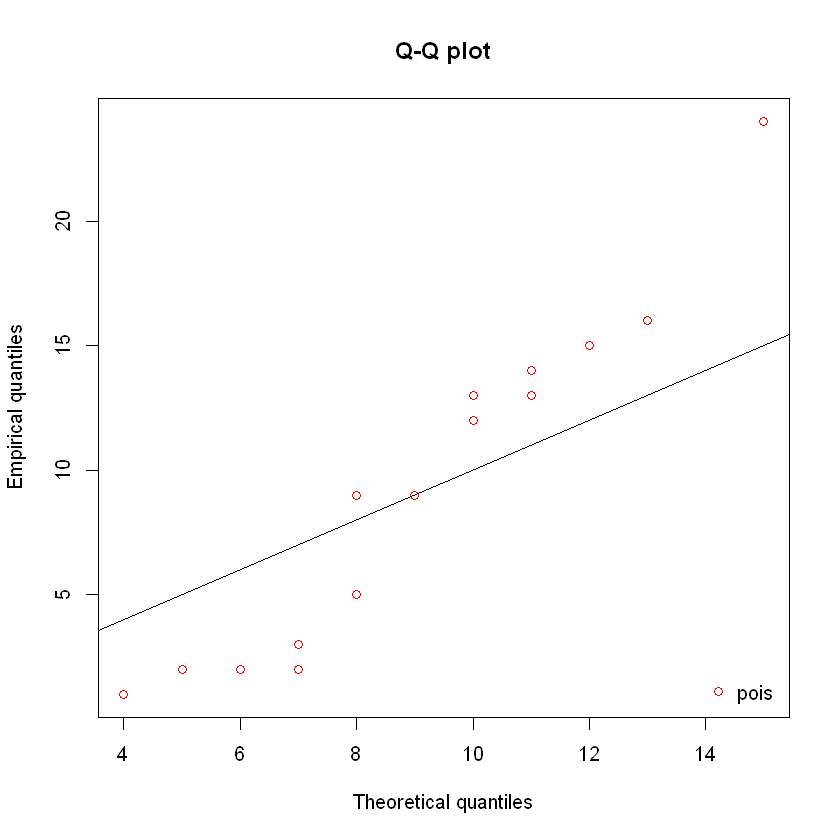

In [167]:
qqcomp(fitdist(results$frequencycount45, "pois"))

The quantile plot strengthens our conclusion that our hurricane data is not entirely a Poisson distribution with a constant 
rate. What if we use a negative binomial distribution for this?

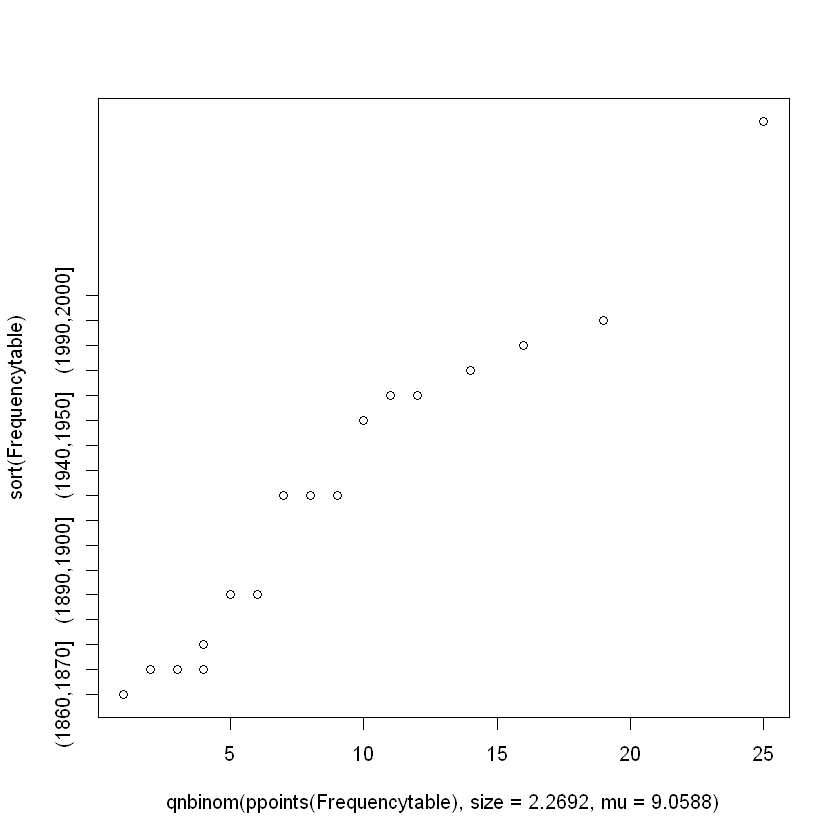

In [137]:
params = fitdistr(Frequencytable, "Negative Binomial")
plot(qnbinom(ppoints(Frequencytable), size=2.2692, mu=9.0588), sort(Frequencytable))

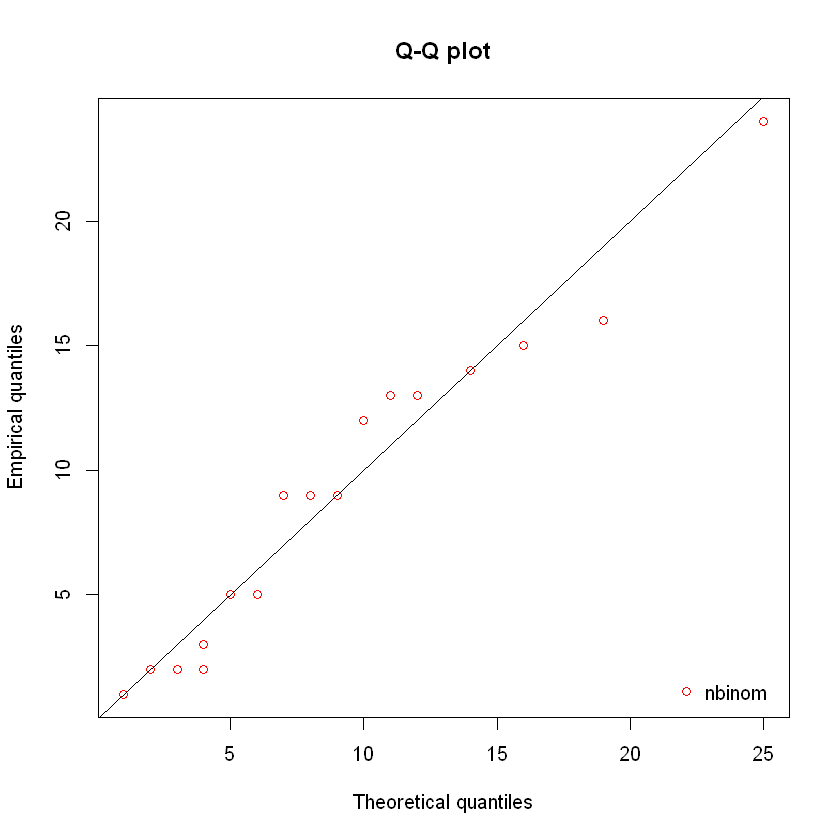

In [138]:
qqcomp(fitdist(results$frequencycount45, "nbinom"))